<h1><center> Mini Project 1 </center></h1>
<h3><center> FINA4390 <center><h3>
<h3><center> By Justin Woo, Deo Gracias Ong, Tshering Penjo, Warin Sae Sae <center><h3>


In [187]:
# https://www.kaggle.com/meenavyas/ucicreditcard/data?fbclid=IwAR1raw2rZgDM24j8l2n5gcET1YhlafBvoDAevQtX5-K7prWFpnWFRdaYndU

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics

#Upload Data

In [189]:
df = pd.read_csv('UCI_Credit_Card.csv')


# Analyze Data

In [190]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [191]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

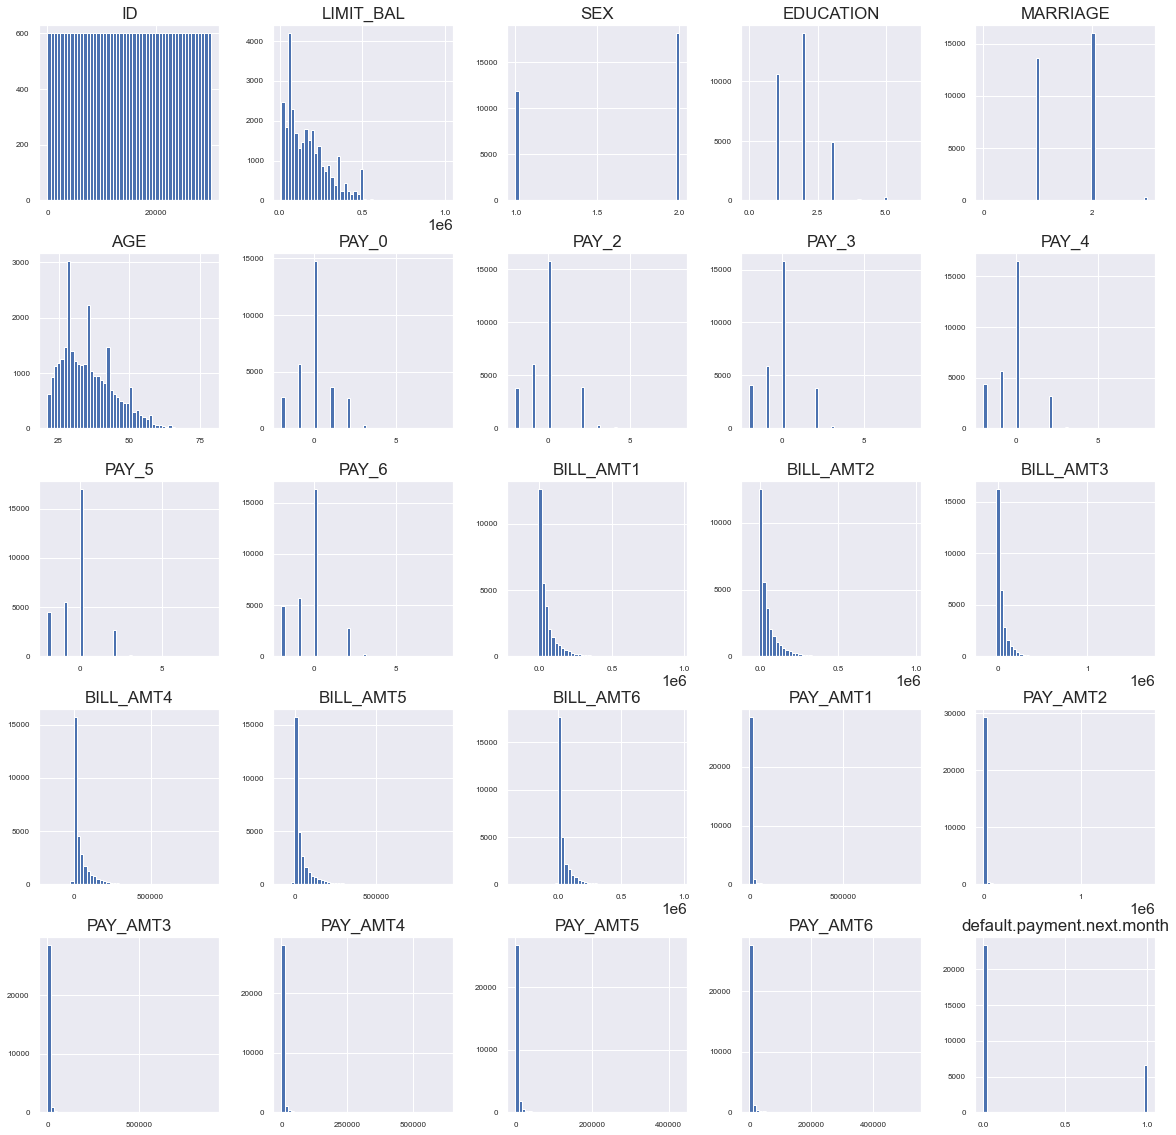

In [192]:
# Histograms
df.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

<AxesSubplot:>

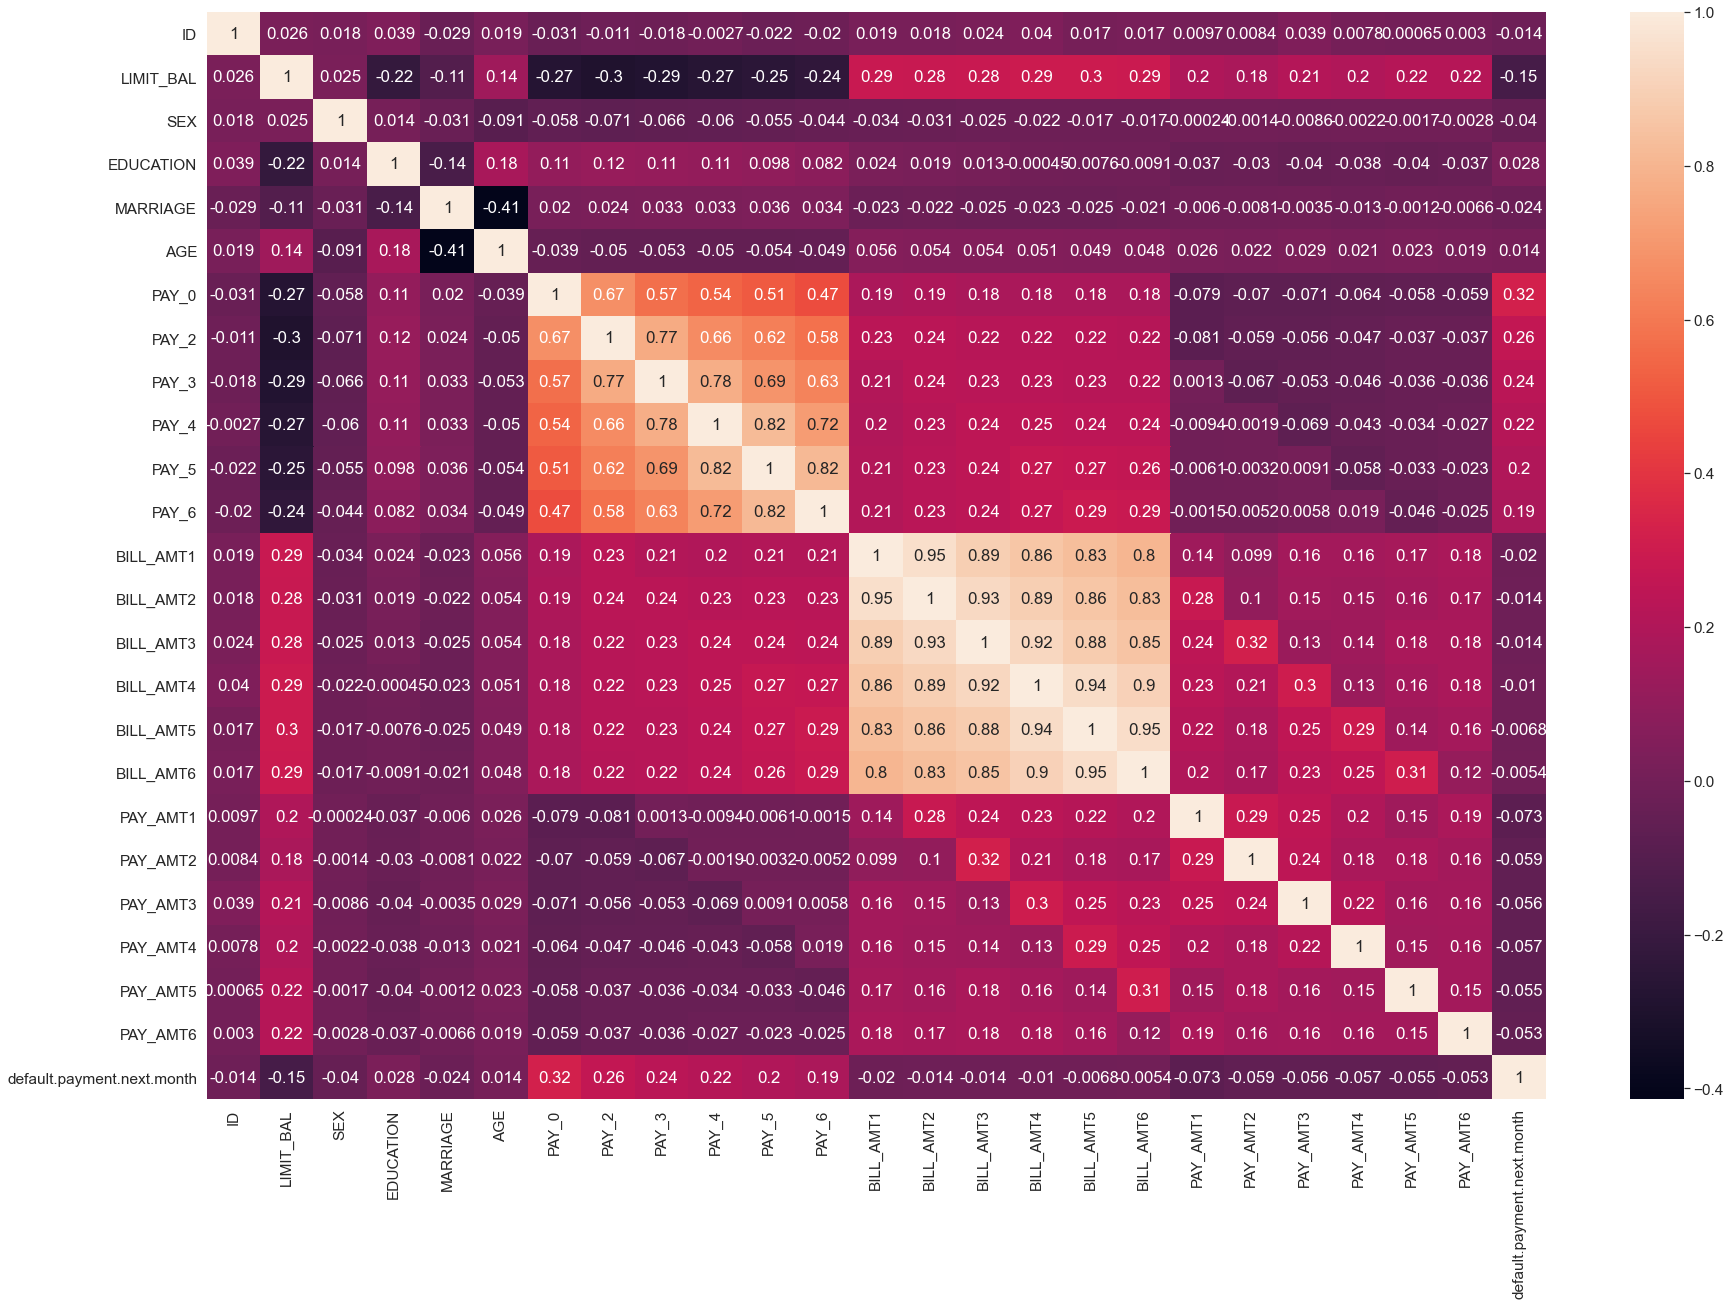

In [193]:
# Heat Map
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(), annot = True)

After analyzing the correlation heatmap, it makes sense to use PAY_1 through PAY_6 as our features for the model, as their correlation to whether an individual defaulted their payment. All other variables had correlations of under an absolute value of 6%. 

#Data Cleaning

In [194]:
# Remove ID column (no value to model)
df.drop(columns = ['ID'], inplace = True)

In [195]:
# Consistent names (Pay 1 - Pay 6)
df.rename(columns = {'PAY_0': 'PAY_1'}, inplace = True)

### Verify correct variable format

In [196]:
df.describe().loc[['min', 'max']][['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
min,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
max,8.0,8.0,8.0,8.0,8.0,8.0


Values for these variables are within the range of -1 to 9, but the original data had min of -2 and a max of 8, so it was assumed that the values were 
shifted down one

In [197]:
'''
df['PAY_1'] = (df['PAY_1'] + 1)
df['PAY_2'] = (df['PAY_2'] + 1)
df['PAY_3'] = (df['PAY_3'] + 1)
df['PAY_4'] = (df['PAY_4'] + 1)
df['PAY_5'] = (df['PAY_5'] + 1)
df['PAY_6'] = (df['PAY_6'] + 1)
'''

"\ndf['PAY_1'] = (df['PAY_1'] + 1)\ndf['PAY_2'] = (df['PAY_2'] + 1)\ndf['PAY_3'] = (df['PAY_3'] + 1)\ndf['PAY_4'] = (df['PAY_4'] + 1)\ndf['PAY_5'] = (df['PAY_5'] + 1)\ndf['PAY_6'] = (df['PAY_6'] + 1)\n"

In [198]:
pay_list = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4','PAY_5',  'PAY_6']
features = pd.DataFrame()
for col in pay_list:
    features[col] = (df[col] + 1).astype(str)
target = df['default.payment.next.month']

In [199]:
# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
cat_columns  = pd.get_dummies(features,drop_first=True)

cat_columns.columns.values

array(['PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5',
       'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_1_9', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_2_9', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3',
       'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_3_9',
       'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_4_9', 'PAY_5_0', 'PAY_5_1',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8',
       'PAY_5_9', 'PAY_6_0', 'PAY_6_1', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5',
       'PAY_6_6', 'PAY_6_7', 'PAY_6_8', 'PAY_6_9'], dtype=object)

<AxesSubplot:>

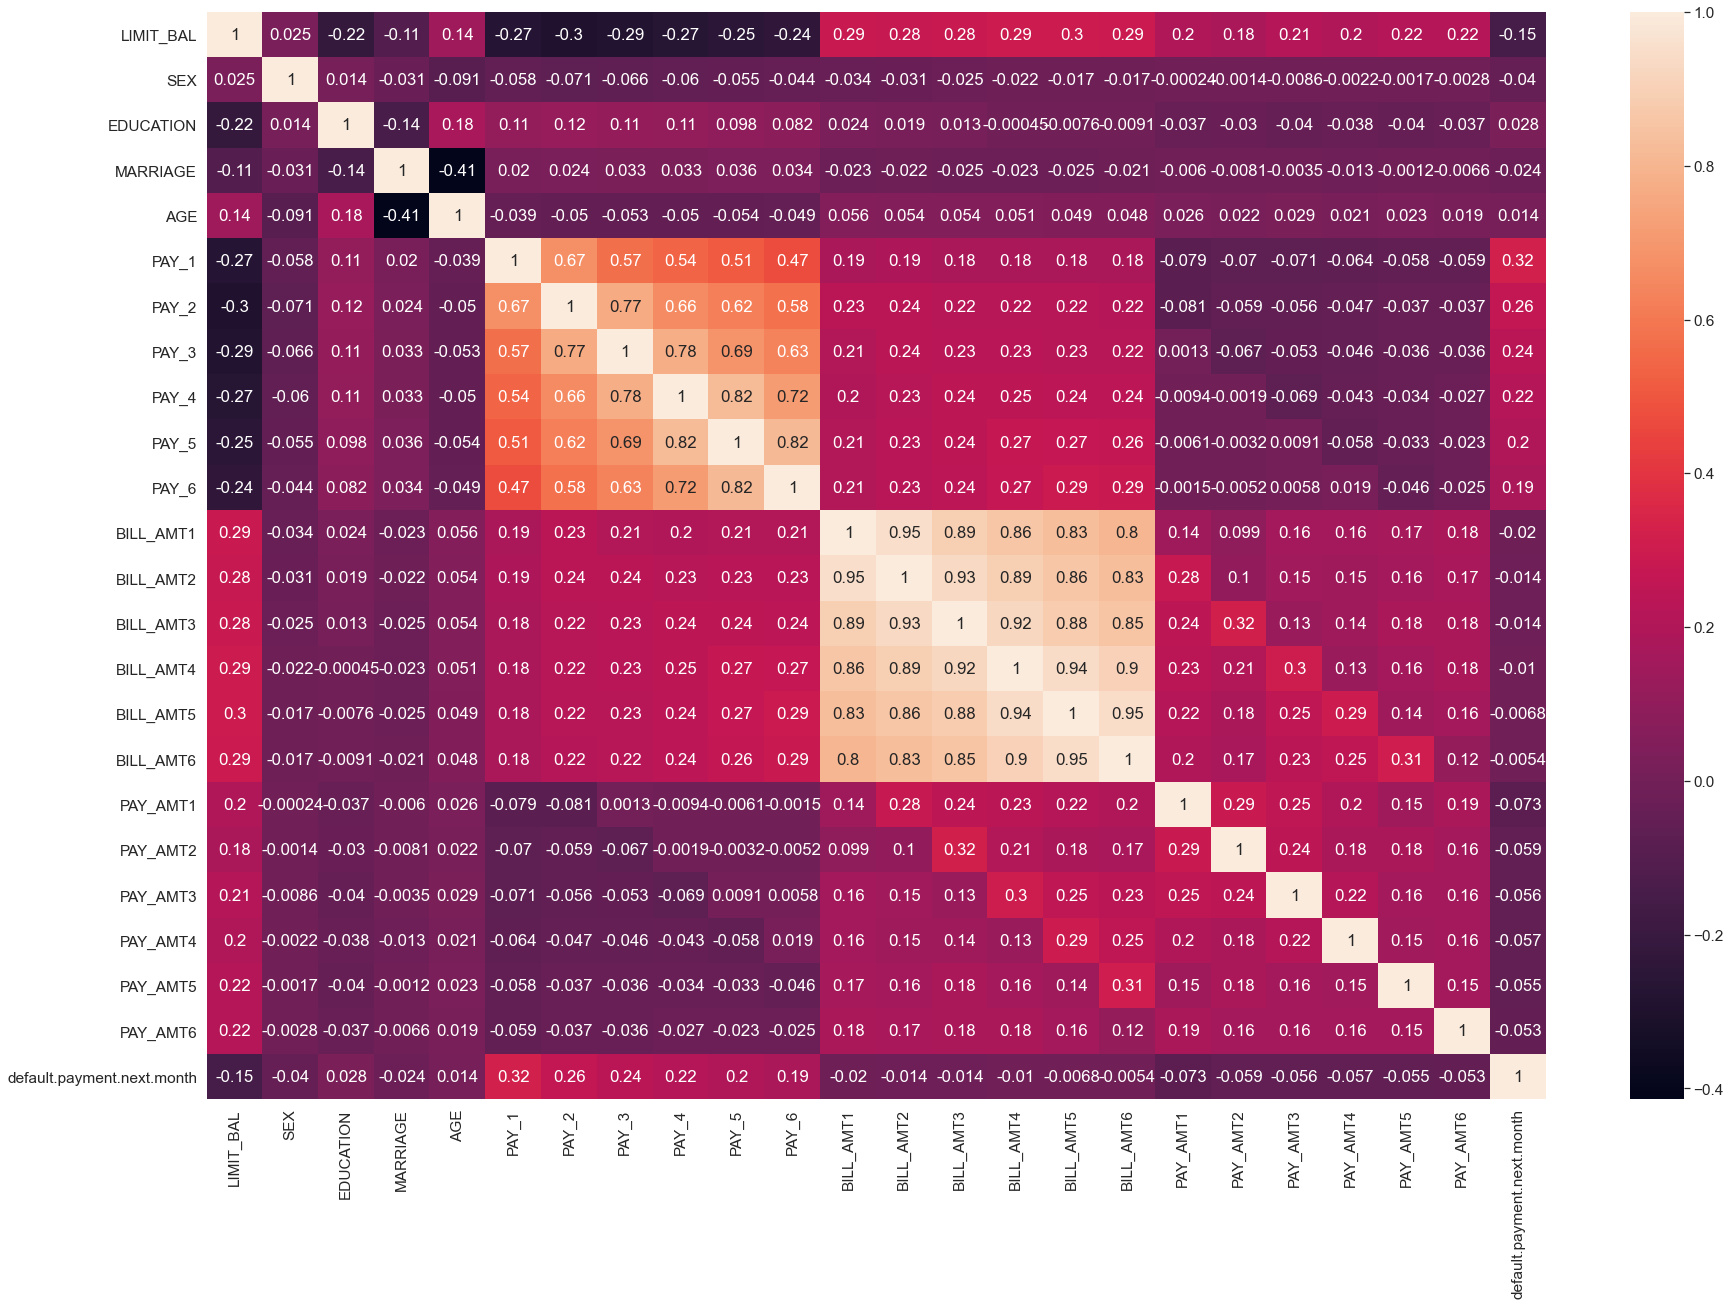

In [200]:
# Heat Map
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(), annot = True)

### Machine Learning


In [201]:
### Creating the Training and Testing Data

In [202]:

df = df.dropna()

X = cat_columns[['PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5',
       'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_1_9', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3',
       'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_3_9',
       'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_4_9', 'PAY_5_0', 'PAY_5_1',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7',
       'PAY_5_9', 'PAY_6_0', 'PAY_6_1', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5',
       'PAY_6_6', 'PAY_6_7', 'PAY_6_8', 'PAY_6_9']]
y = target

# Add a constant to the independent value
X1 = sm.add_constant(X)


# Split the sample into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# make regression model 
model = sm.Logit(y_train, X_train)

# fit model and print results
results = model.fit()
#print(results.summary())


# odds ratios only
#print("Odds ratios are")
#print(np.exp(results.params))


# Predict outcomes
prob_pred = results.predict(X_test)
#print(prob_pred)


y_pred = [ 0 if x < 0.45 else 1 for x in prob_pred]
y_test = y_test.squeeze()


df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted prob':prob_pred })
df.head()


print(confusion_matrix(df["Actual"], df["Predicted"]))


confusion_df = pd.DataFrame(confusion_matrix(df["Actual"], df["Predicted"]),
             columns=["Predicted group " + str(cat) for cat in [0,1]],
             index = ["Actual group " + str(cat) for cat in [0,1]])

print(confusion_df.head())
print(" ")
print(" ")
print(classification_report(df["Actual"], df["Predicted"], digits=3))
print(" ")
print(" ")
print("Accuracy score is")
print(accuracy_score(df["Actual"], df["Predicted"]))
print(" ")
print(" ")

         Current function value: 0.465271
         Iterations: 35
[[4069  634]
 [ 754  543]]
                Predicted group 0  Predicted group 1
Actual group 0               4069                634
Actual group 1                754                543
 
 
              precision    recall  f1-score   support

           0      0.844     0.865     0.854      4703
           1      0.461     0.419     0.439      1297

    accuracy                          0.769      6000
   macro avg      0.653     0.642     0.647      6000
weighted avg      0.761     0.769     0.765      6000

 
 
Accuracy score is
0.7686666666666667
 
 


/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[[4069  634]
 [ 754  543]]


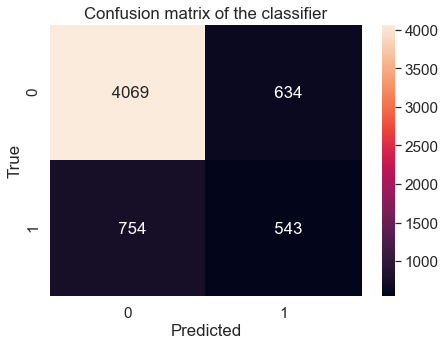

In [203]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)


cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize = (7,5))
sns.heatmap(cf_df, annot=True,fmt='5.0f')
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()